In [1]:
import pickle
import pycaret
import pandas as pd
import seaborn as sns
import preprocessing_functions
from pycaret.classification import *

Loading the data
and
Basic preprocessing actions (Fitbit)
1. Select experiment dates
2. Drop duplicates
3. Type conversion
4. One hot encoding

In [2]:
fitbit=pd.read_pickle('data/daily_fitbit_df_unprocessed.pkl')
fitbit=preprocessing_functions.fitbit_basic_preprocessing(fitbit)
fitbit=preprocessing_functions.fitbit_one_hot_encoding(fitbit)

fitbit

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,calories,filteredDemographicVO2Max,distance,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,scl_avg,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi,True,False,Aerobic Workout,Bike,Bootcamp,Circuit Training,Elliptical,Hike,Interval Workout,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,NaN,14.8,78.0,0.833333,0.675,0.866667,-1.788325,2351.59,62.79210,6517.5,71.701565,149.0,24.0,33.0,713.0,NaN,62.073070,31260000.0,0.0,445.0,76.0,0.0,93.0,1.243243,0.987013,0.921642,1.341772,8833.0,83.0,1349.0,0.0,0.0,0.0,0.0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,621e301e67b776a240608a72,2021-05-24,34.710232,NaN,NaN,NaN,NaN,74.0,0.700000,0.700,0.833333,-1.822489,3682.90,46.44026,8567.1,81.644017,227.0,8.0,3.0,729.0,NaN,61.390017,28380000.0,0.0,408.0,65.0,0.0,94.0,0.892157,0.928571,0.847826,0.922222,12441.0,164.0,997.0,49.0,0.0,0.0,1.0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,621e301367b776a24057738e,2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2147.17,49.73933,5337.8,104.619583,61.0,3.0,43.0,1333.0,NaN,72.436947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7279.0,32.0,236.0,30.0,0.0,1.0,0.0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,621e360b67b776a24039709f,2021-05-24,NaN,68.321,31.413,NaN,15.4,69.0,0.633333,0.650,0.800000,-2.055332,1723.61,45.23770,5028.5,77.061042,272.0,8.0,2.0,723.0,NaN,68.243822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7493.0,127.0,1306.0,7.0,0.0,1.0,1.0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,621e2fce67b776a240279baa,2021-05-24,34.783747,83.170,15.941,96.6,15.2,70.0,0.733333,0.725,0.633333,-0.720949,2393.99,43.67853,2444.9,94.808800,143.0,0.0,0.0,796.0,NaN,85.806939,30060000.0,0.0,438.0,63.0,19.0,96.0,1.079545,1.145455,1.240741,0.663717,3317.0,701.0,735.0,0.0,0.0,0.0,0.0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4959,621e345267b776a240691064,2022-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1339.20,NaN,NaN,NaN,0.0,0.0,0.0,1440.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4960,621e310d67b776a24003096d,2022-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1252.80,NaN,NaN,NaN,0.0,0.0,0.0,1440.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4961,621e324e67b776a2400191cb,2022-01-17,33.104768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.469242,2150.69,44.99934,3079.0,NaN,176.0,4.0,5.0,579.0,NaN,63.885053,19320000.0,0.0,272.0,50.0,0.0,96.0,1.050000,0.961538,0.974093,0.381818,4278.0,NaN,NaN,NaN,NaN,1.0,0.0,2,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4962,621e30f467b776a240f22944,2022-01-17,34.352490,NaN,NaN,NaN,13.4,NaN,NaN,NaN,NaN,-2.346201,1864.23,60.17697,2233.9,63.148837,157.0,0.0,0.0,706.0,NaN,58.144251,29940000.0,0.0,421.0,78.0,0.0,94.0,0.701754,1.368421,1.103806,0.849315,3122.0,2.0,1348.0,0.0,0.0,0.0,0.0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
fitbit = preprocessing_functions.date_engineering(fitbit)
fitbit

,id,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,calories,filteredDemographicVO2Max,distance,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,scl_avg,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi,True,False,Aerobic Workout,Bike,Bootcamp,Circuit Training,Elliptical,Hike,Interval Workout,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos
0,621e2e8e67b776a24055b564,34.137687,57.432,89.603,NaN,14.8,78.0,0.833333,0.675,0.866667,-1.788325,2351.59,62.79210,6517.5,71.701565,149.0,24.0,33.0,713.0,NaN,62.073070,31260000.0,0.0,445.0,76.0,0.0,93.0,1.243243,0.987013,0.921642,1.341772,8833.0,83.0,1349.0,0.0,0.0,0.0,0.0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.866025,0.0,0.309017,-0.988468,0.5,1.0,0.951057,0.151428
1,621e301e67b776a240608a72,34.710232,NaN,NaN,NaN,NaN,74.0,0.700000,0.700,0.833333,-1.822489,3682.90,46.44026,8567.1,81.644017,227.0,8.0,3.0,729.0,NaN,61.390017,28380000.0,0.0,408.0,65.0,0.0,94.0,0.892157,0.928571,0.847826,0.922222,12441.0,164.0,997.0,49.0,0.0,0.0,1.0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.866025,0.0,0.309017,-0.988468,0.5,1.0,0.951057,0.151428
3,621e301367b776a24057738e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2147.17,49.73933,5337.8,104.619583,61.0,3.0,43.0,1333.0,NaN,72.436947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7279.0,32.0,236.0,30.0,0.0,1.0,0.0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.866025,0.0,0.309017,-0.988468,0.5,1.0,0.951057,0.151428
4,621e360b67b776a24039709f,NaN,68.321,31.413,NaN,15.4,69.0,0.633333,0.650,0.800000,-2.055332,1723.61,45.23770,5028.5,77.061042,272.0,8.0,2.0,723.0,NaN,68.243822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7493.0,127.0,1306.0,7.0,0.0,1.0,1.0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.866025,0.0,0.309017,-0.988468,0.5,1.0,0.951057,0.151428
5,621e2fce67b776a240279baa,34.783747,83.170,15.941,96.6,15.2,70.0,0.733333,0.725,0.633333,-0.720949,2393.99,43.67853,2444.9,94.808800,143.0,0.0,0.0,796.0,NaN,85.806939,30060000.0,0.0,438.0,63.0,19.0,96.0,1.079545,1.145455,1.240741,0.663717,3317.0,701.0,735.0,0.0,0.0,0.0,0.0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.866025,0.0,0.309017,-0.988468,0.5,1.0,0.951057,0.151428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4959,621e345267b776a240691064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1339.20,NaN,NaN,NaN,0.0,0.0,0.0,1440.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.866025,0.0,0.809017,-0.299363,0.5,1.0,0.587785,-0.954139
4960,621e310d67b776a24003096d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1252.80,NaN,NaN,NaN,0.0,0.0,0.0,1440.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.866025,0.0,0.809017,-0.299363,0.5,1.0,0.587785,-0.954139
4961,621e324e67b776a2400191cb,33.104768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.469242,2150.69,44.99934,3079.0,NaN,176.0,4.0,5.0,579.0,NaN,63.885053,19320000.0,0.0,272.0,50.0,0.0,96.0,1.050000,0.961538,0.974093,0.381818,4278.0,NaN,NaN,NaN,NaN,1.0,0.0,2,0,1,NaN,NaN,NaN,NaN,NaN,N

# Gender prediction

In [4]:
data = fitbit.drop(columns=['age', 'bmi'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

In [5]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [6]:
s = setup(data=train_data, target='gender', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,gender
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(3308, 63)"
5,Missing Values,True
6,Numeric Features,42
7,Categorical Features,20
8,Ordinal Features,False
9,High Cardinality Features,False


In [7]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9114,0.9627,0.8224,0.9446,0.8516,0.7947,0.8199,0.0200
ridge,Ridge Classifier,0.9113,0.0000,0.8215,0.9459,0.8514,0.7947,0.8201,0.0133
lightgbm,Light Gradient Boosting Machine,0.9036,0.9577,0.8547,0.8772,0.8580,0.7844,0.7925,0.2500
gbc,Gradient Boosting Classifier,0.9029,0.9533,0.8485,0.8806,0.8542,0.7812,0.7915,0.3033
ada,Ada Boost Classifier,0.8899,0.9341,0.7782,0.8860,0.8164,0.7381,0.7526,0.1267
rf,Random Forest Classifier,0.8230,0.9069,0.6723,0.8108,0.7093,0.5875,0.6113,0.0933
dt,Decision Tree Classifier,0.8188,0.8083,0.7563,0.7316,0.7292,0.5943,0.6071,0.0200
et,Extra Trees Classifier,0.7710,0.8783,0.5060,0.7843,0.5552,0.4355,0.4806,0.0800
knn,K Neighbors Classifier,0.7331,0.7335,0.4542,0.6285,0.5226,0.3468,0.3573,0.6167
lr,Logistic Regression,0.6908,0.7269,0.4321,0.3515,0.3855,0.2501,0.2538,0.9733


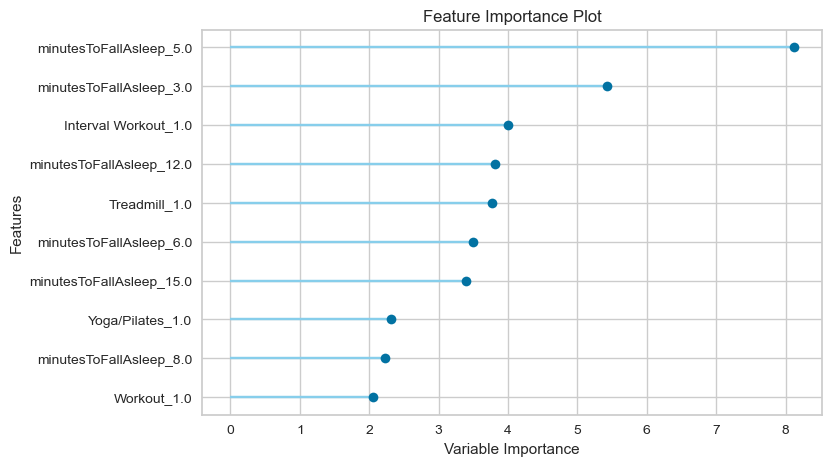

In [8]:
plot_model(best, plot='feature')

# Age prediction

In [9]:
data = fitbit.drop(columns=['gender', 'bmi'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

In [10]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [11]:
s = setup(data=train_data, target='age', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,age
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(3308, 63)"
5,Missing Values,True
6,Numeric Features,42
7,Categorical Features,20
8,Ordinal Features,False
9,High Cardinality Features,False


In [12]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.6343,0.0000,0.3333,0.2208,0.2657,0.0000,0.0000,0.0333
et,Extra Trees Classifier,0.6132,0.6500,0.5634,0.6276,0.5623,0.2402,0.2736,0.1000
rf,Random Forest Classifier,0.5915,0.6722,0.5625,0.6185,0.5432,0.2116,0.2570,0.1100
dt,Decision Tree Classifier,0.5758,0.5960,0.4885,0.5924,0.5068,0.1620,0.1913,0.0167
lightgbm,Light Gradient Boosting Machine,0.5751,0.6783,0.5580,0.5830,0.5245,0.1722,0.2208,0.3233
gbc,Gradient Boosting Classifier,0.5659,0.6589,0.5483,0.5794,0.5264,0.1629,0.1926,0.3133
ada,Ada Boost Classifier,0.5503,0.6347,0.5922,0.5508,0.5418,0.1379,0.1562,0.1067
nb,Naive Bayes,0.5438,0.5311,0.3153,0.5349,0.3896,0.0625,0.0780,0.0133
qda,Quadratic Discriminant Analysis,0.5137,0.4943,0.5792,0.4400,0.4413,-0.0204,-0.0045,0.0200
lda,Linear Discriminant Analysis,0.5074,0.5220,0.3745,0.5018,0.4128,0.0118,0.0320,0.0200


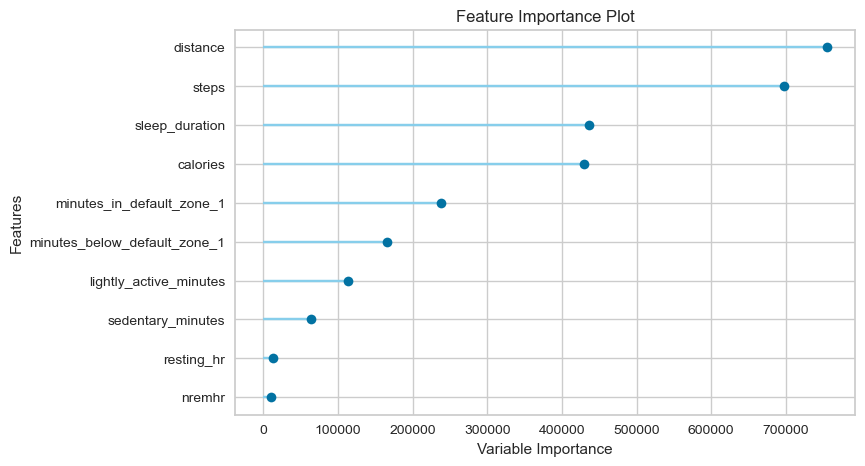

In [13]:
plot_model(best, plot='feature')

In [14]:
fitbit=pd.read_pickle('data/daily_fitbit_df_unprocessed.pkl')
fitbit=preprocessing_functions.fitbit_basic_preprocessing(fitbit)
fitbit=preprocessing_functions.fitbit_one_hot_encoding(fitbit)
data = preprocessing_functions.post_preprocessing(fitbit, isSema=True)

In [15]:
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [16]:
s = setup(data=train_data, target='age', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,age
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(3308, 63)"
5,Missing Values,False
6,Numeric Features,59
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [17]:
best=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.5990,0.6369,0.5395,0.5470,0.5307,0.1926,0.1997,0.2733
et,Extra Trees Classifier,0.5929,0.5859,0.4722,0.5553,0.4719,0.1768,0.1987,0.0833
rf,Random Forest Classifier,0.5812,0.5562,0.4922,0.5274,0.4788,0.1579,0.1727,0.0967
dummy,Dummy Classifier,0.5747,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0100
dt,Decision Tree Classifier,0.5728,0.5677,0.5067,0.5033,0.4989,0.1337,0.1360,0.0167
lightgbm,Light Gradient Boosting Machine,0.5678,0.6079,0.5282,0.5044,0.4973,0.1379,0.1468,0.2500
svm,SVM - Linear Kernel,0.5548,0.0000,0.3333,0.1567,0.2132,0.0000,0.0000,0.0233
qda,Quadratic Discriminant Analysis,0.5366,0.5407,0.4468,0.4844,0.4541,0.0353,0.0349,0.0167
ada,Ada Boost Classifier,0.5356,0.6284,0.5901,0.4903,0.5167,0.1094,0.1129,0.0900
lr,Logistic Regression,0.5343,0.4762,0.0924,0.2222,0.1245,-0.0340,-0.0411,0.0200


In [18]:
s = setup(data=train_data, target='age', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data, 
          normalize=True, normalize_method='minmax', transformation=True, transformation_method='quantile')

,Description,Value
0,session_id,123
1,Target,age
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(3308, 63)"
5,Missing Values,False
6,Numeric Features,59
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [19]:
best= compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.5990,0.6372,0.5384,0.5480,0.5301,0.1927,0.2002,0.2733
rf,Random Forest Classifier,0.5836,0.5576,0.4965,0.5338,0.4811,0.1641,0.1809,0.1000
et,Extra Trees Classifier,0.5804,0.5934,0.4527,0.5514,0.4506,0.1547,0.1795,0.0833
svm,SVM - Linear Kernel,0.5803,0.0000,0.1513,0.5359,0.2292,0.0440,0.0683,0.0267
dummy,Dummy Classifier,0.5747,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0100
dt,Decision Tree Classifier,0.5686,0.5640,0.5033,0.4997,0.4942,0.1267,0.1292,0.0200
lightgbm,Light Gradient Boosting Machine,0.5590,0.6093,0.5380,0.4969,0.4985,0.1274,0.1352,0.0800
ada,Ada Boost Classifier,0.5363,0.6291,0.5888,0.4907,0.5163,0.1099,0.1137,0.0900
knn,K Neighbors Classifier,0.5214,0.5023,0.3060,0.4071,0.3443,-0.0111,-0.0149,0.1433
lr,Logistic Regression,0.5126,0.5169,0.3754,0.4482,0.3864,0.0079,0.0152,0.0333


# BMI prediction

In [20]:
data = fitbit.drop(columns=['date', 'gender', 'age'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

In [21]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [22]:
s = setup(data=train_data, target='bmi', silent=True, session_id=123, fold_strategy='groupkfold', fold=2,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,bmi
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(3308, 55)"
5,Missing Values,True
6,Numeric Features,35
7,Categorical Features,19
8,Ordinal Features,False
9,High Cardinality Features,False


In [23]:
best = compare_models(errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.5636,0.6665,0.4178,0.5020,0.5158,0.2357,0.2508,1.4050
lda,Linear Discriminant Analysis,0.5314,0.7068,0.3539,0.5097,0.5133,0.2372,0.2446,0.0250
lightgbm,Light Gradient Boosting Machine,0.5212,0.6744,0.4090,0.4764,0.4926,0.2008,0.2060,0.4200
dt,Decision Tree Classifier,0.5172,0.6030,0.3647,0.4948,0.4865,0.1909,0.1988,0.0250
rf,Random Forest Classifier,0.5166,0.6533,0.3572,0.4499,0.4538,0.1350,0.1529,0.1300
et,Extra Trees Classifier,0.5028,0.6266,0.3365,0.4455,0.4396,0.1340,0.1422,0.1250
svm,SVM - Linear Kernel,0.5026,0.0000,0.2500,0.2654,0.3438,0.0000,0.0000,0.0400
dummy,Dummy Classifier,0.5026,0.5000,0.2500,0.2654,0.3438,0.0000,0.0000,0.0150
ridge,Ridge Classifier,0.4889,0.0000,0.2962,0.4442,0.4373,0.1139,0.1299,0.0200
nb,Naive Bayes,0.4639,0.5487,0.3051,0.4428,0.4235,0.1002,0.1090,0.0200


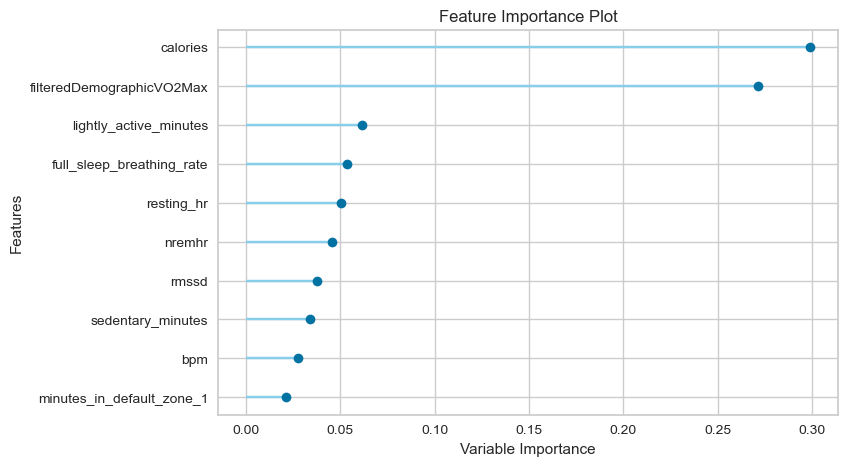

In [24]:
plot_model(best, plot='feature')

In [25]:
best

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

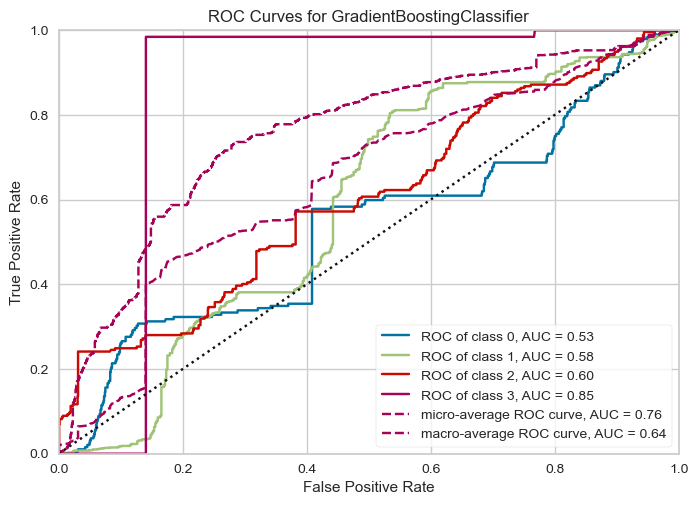

In [26]:
plot_model(best, plot='auc')